In [45]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [46]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import os
import shutil

titanic_path = kagglehub.competition_download('titanic')
source = titanic_path
dest = '../kaggle/'

for file in os.listdir(source):
    shutil.move(os.path.join(source, file), dest)

print('Data source import complete.')


Data source import complete.


In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
train_data= pd.read_csv("../kaggle/train.csv")

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
for col in train_data.columns:
  null_count=train_data[col].isnull().sum();
  print(col,null_count)

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2
Survived 0


In [54]:
# prompt: shift survived column at the last of the columns

cols = list(train_data.columns.values)
cols.pop(cols.index('Survived'))
train_data = train_data[cols+['Survived']]
train_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [55]:
# prompt: find categorical and numerical columns

categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)


Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']


In [56]:
for col in categorical_cols:
  if(col!='Name' and col!='Ticket'):
    print(col,train_data[col].unique())

Sex ['male' 'female']
Cabin [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
Embarked ['S' '

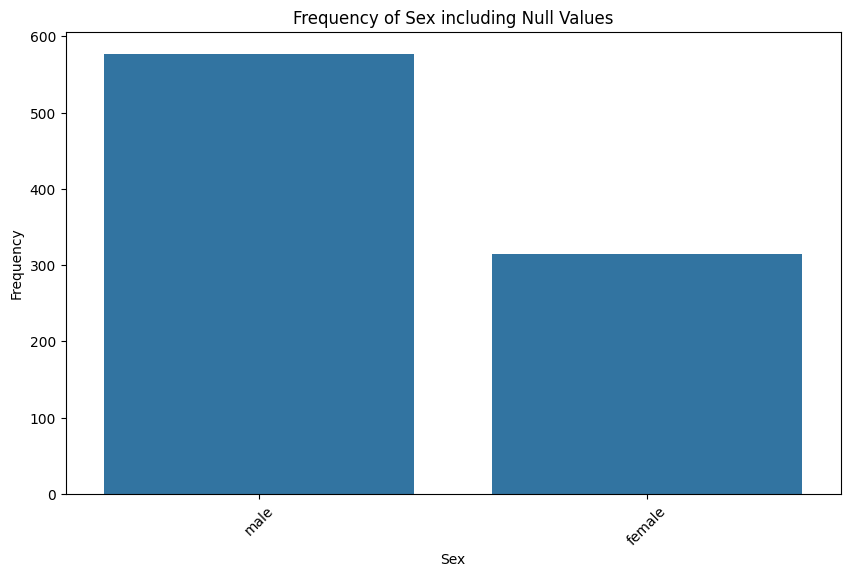

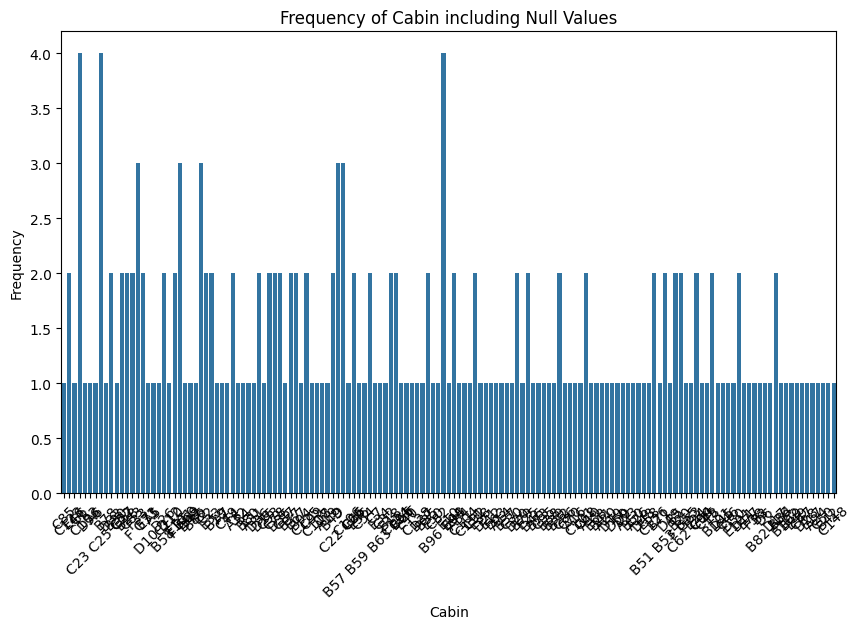

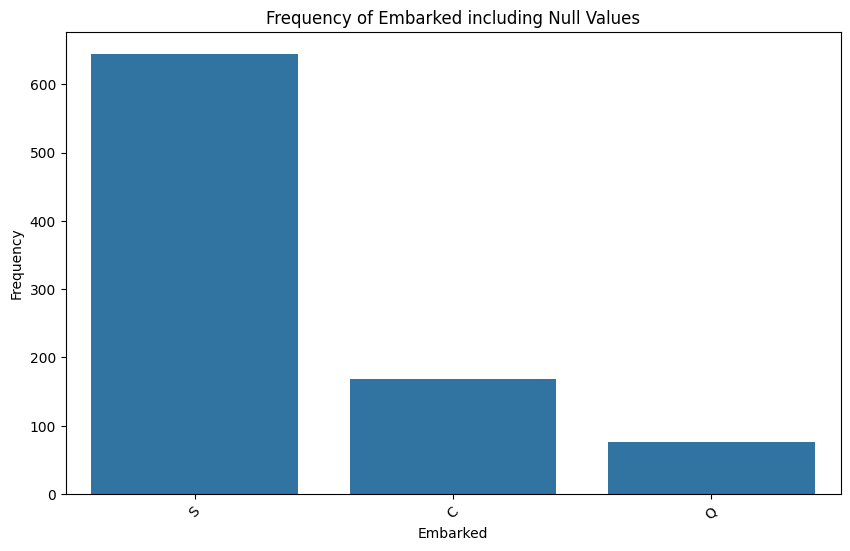

In [57]:
# prompt: plot a bar graph of these categorical variables showing frequency of each value along with null values

import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    if col not in ['Name', 'Ticket']:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=train_data)
        plt.title(f'Frequency of {col} including Null Values')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()


In [58]:
# prompt: In feature embarked fill the null vales to "S"

train_data['Embarked'] = train_data['Embarked'].fillna('S')


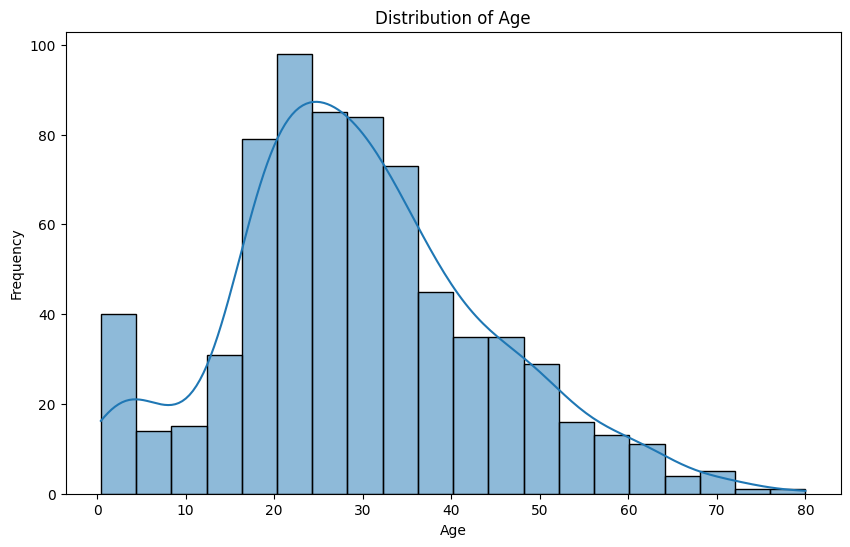

In [59]:
# prompt: create a graph for the age feature

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [60]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

<ipython-input-60-f050d84d189b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


In [61]:
for col in train_data.columns:
  null_count=train_data[col].isnull().sum();
  print(col,null_count)

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 0
Survived 0


In [62]:
# prompt: apply one hot encoding on gender and embarked


# One-hot encode 'Sex' and 'Embarked' columns
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Display the updated DataFrame
train_data.head()


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,False,False,True
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,True,False,True


In [67]:
train_data.head(10)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,1,False,False,True
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,True,False,True
5,6,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,0,True,True,False
6,7,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E,0,True,False,True
7,8,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,0,True,False,True
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,1,False,False,True
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,1,False,False,False


In [68]:
train_data['Cabin'] = train_data['Cabin'].str[0]

In [69]:
train_data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Survived,Sex_male,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C,1,False,False,True
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,True,False,True


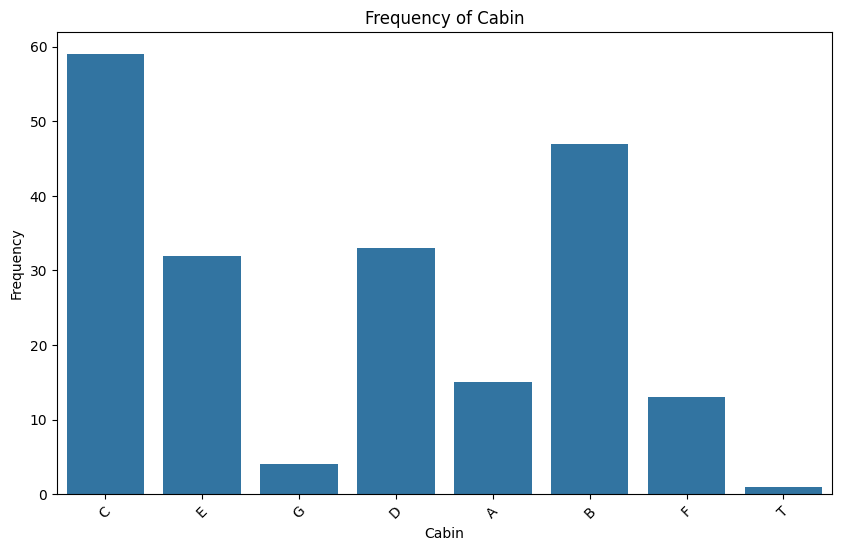

In [70]:
# prompt: plot bar graph for the cabin column of frequency

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin', data=train_data)
plt.title('Frequency of Cabin')
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [71]:
# prompt: fill nan values in cabin to C and apply one hot encoding in this

train_data['Cabin'].fillna('C', inplace=True)

# One-hot encode 'Cabin'
train_data = pd.get_dummies(train_data, columns=['Cabin'], drop_first=True)

# Display the updated DataFrame
train_data.head()


<ipython-input-71-7e259e97ce46>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna('C', inplace=True)


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,True,False,True,False,True,False,False,False,False,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,False,False,False,False,True,False,False,False,False,False
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,False,False,True,False,True,False,False,False,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,False,False,True,False,True,False,False,False,False,False
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,True,False,True,False,True,False,False,False,False,False


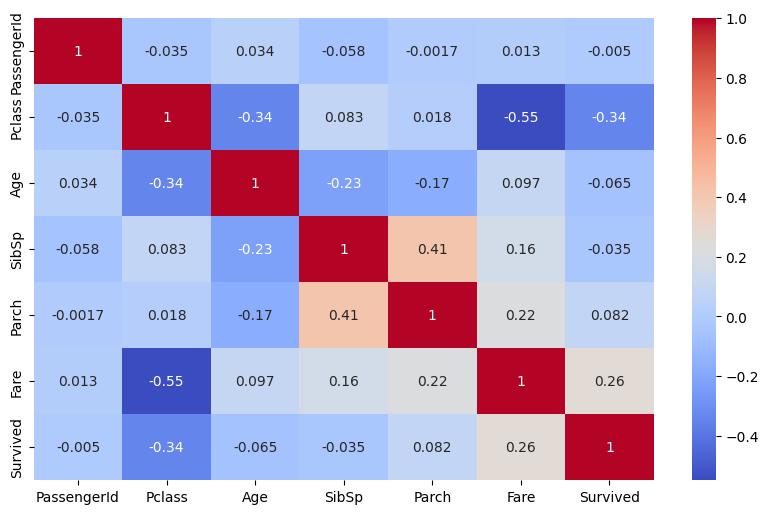

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


In [73]:
# prompt: save the passenger id in a variable and then drop passenger id, name and ticket columns

passenger_id = train_data['PassengerId']
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)


In [74]:
cols = list(train_data.columns.values)
cols.pop(cols.index('Survived'))
train_data = train_data[cols+['Survived']]
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Survived
0,3,22.0,1,0,7.2500,True,False,True,False,True,False,False,False,False,False,0
1,1,38.0,1,0,71.2833,False,False,False,False,True,False,False,False,False,False,1
2,3,26.0,0,0,7.9250,False,False,True,False,True,False,False,False,False,False,1
3,1,35.0,1,0,53.1000,False,False,True,False,True,False,False,False,False,False,1
4,3,35.0,0,0,8.0500,True,False,True,False,True,False,False,False,False,False,0


In [75]:
for col in train_data.columns:
  null_count=train_data[col].isnull().sum();
  print(col,null_count)

Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0
Sex_male 0
Embarked_Q 0
Embarked_S 0
Cabin_B 0
Cabin_C 0
Cabin_D 0
Cabin_E 0
Cabin_F 0
Cabin_G 0
Cabin_T 0
Survived 0


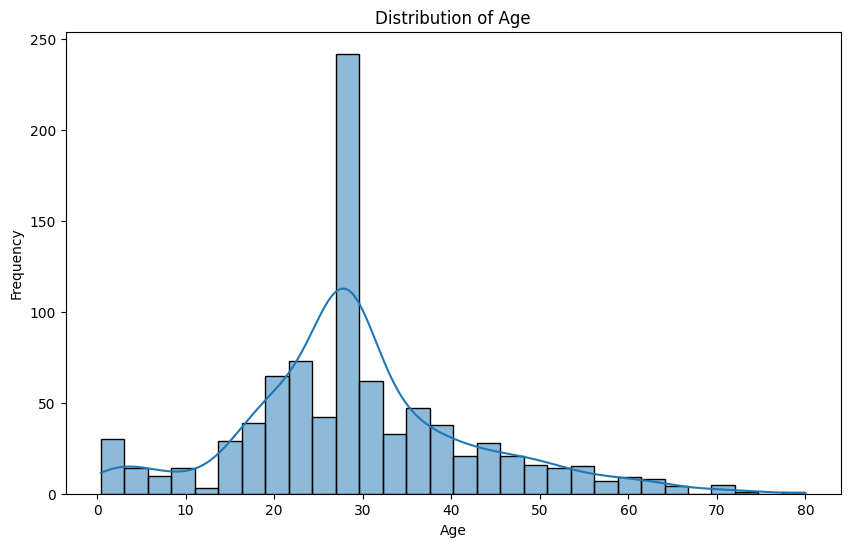

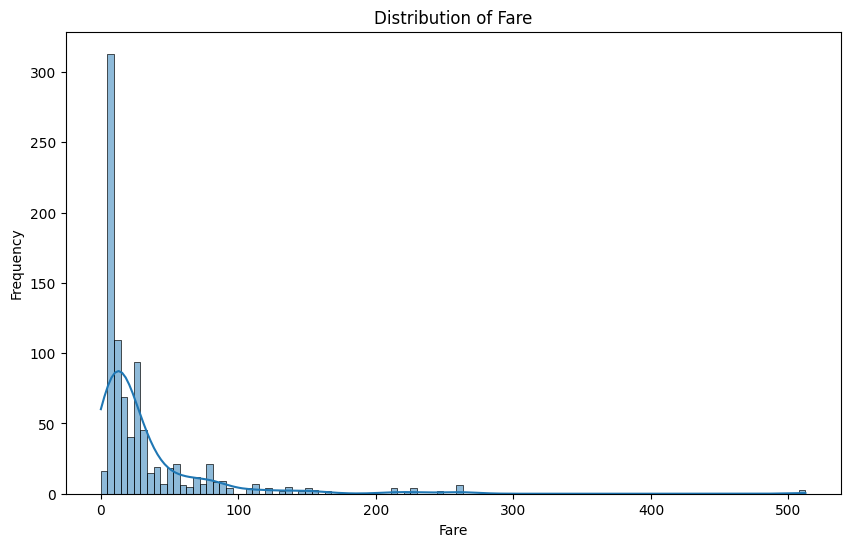

In [76]:
# prompt: plot the graph of age and fare separately

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [77]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Survived
0,3,22.0,1,0,7.2500,True,False,True,False,True,False,False,False,False,False,0
1,1,38.0,1,0,71.2833,False,False,False,False,True,False,False,False,False,False,1
2,3,26.0,0,0,7.9250,False,False,True,False,True,False,False,False,False,False,1
3,1,35.0,1,0,53.1000,False,False,True,False,True,False,False,False,False,False,1
4,3,35.0,0,0,8.0500,True,False,True,False,True,False,False,False,False,False,0


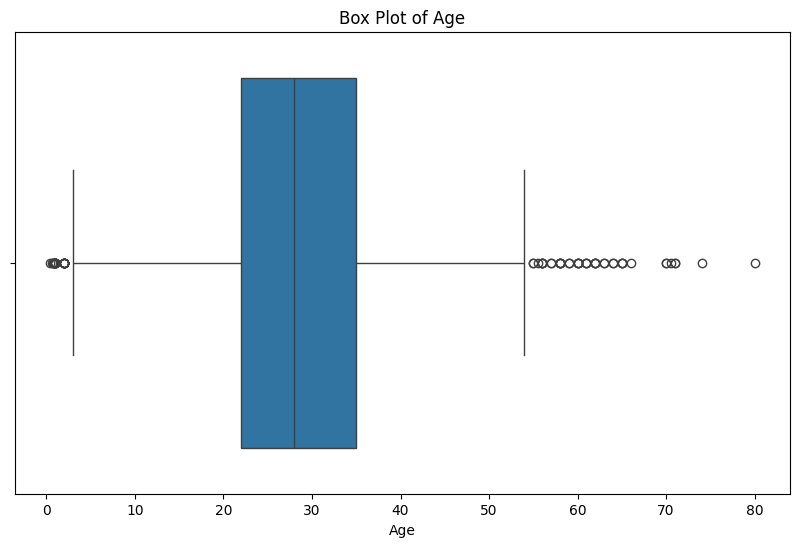

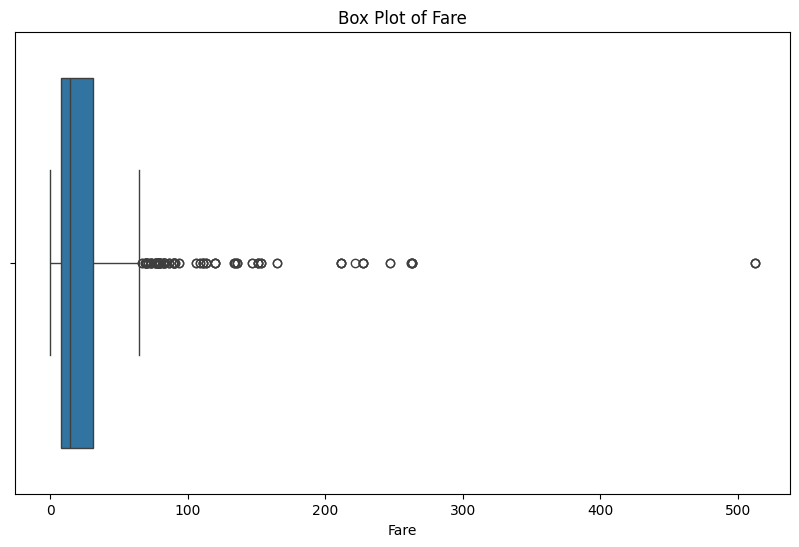

In [79]:
# prompt: create a box plot of the age and fair columns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=train_data)
plt.title('Box Plot of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fare', data=train_data)
plt.title('Box Plot of Fare')
plt.show()


In [29]:
# # prompt: Help me remove outliers from these numerical columns

# def remove_mild_outliers(df, column_names, multiplier=2.5):
#     df_filtered = df.copy()
#     for col in column_names:
#         Q1 = df_filtered[col].quantile(0.25)
#         Q3 = df_filtered[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - multiplier * IQR
#         upper_bound = Q3 + multiplier * IQR
#         df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
#     return df_filtered

# # Usage
# train_data = remove_mild_outliers(train_data, ['Age', 'Fare'], multiplier=2.5)


# # Now 'train_data' contains the DataFrame without outliers in 'Age' and 'Fare'


In [80]:
for col in train_data.columns:
  null_count=train_data[col].isnull().sum();
  print(col,null_count)

Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0
Sex_male 0
Embarked_Q 0
Embarked_S 0
Cabin_B 0
Cabin_C 0
Cabin_D 0
Cabin_E 0
Cabin_F 0
Cabin_G 0
Cabin_T 0
Survived 0


In [82]:
# prompt: normalize the columns so that data skeness and removed and data is normalized

from sklearn.preprocessing import PowerTransformer, StandardScaler

train_data=train_data.dropna(subset=['Age', 'Fare'])

# Step 4: Apply PowerTransformer on 'Fare'
pt = PowerTransformer(method='yeo-johnson')  # handles 0 and negative values
train_data[['Fare']] = pt.fit_transform(train_data[['Fare']])

# Step 5: Apply StandardScaler on 'Age'
scaler = StandardScaler()
train_data[['Age']] = scaler.fit_transform(train_data[['Age']])

# Step 6: Check for NaNs (optional)
print(train_data[['Age', 'Fare']].isna().sum())


# # ... (Your existing code)
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

# # Normalize numerical features using StandardScaler
# numerical_cols_to_scale = ['Age', 'Fare']  # Specify the numerical columns to scale
# scaler = StandardScaler()
# train_data[numerical_cols_to_scale] = scaler.fit_transform(train_data[numerical_cols_to_scale])

# # Display the updated DataFrame with normalized columns
# train_data.head()


Age     0
Fare    0
dtype: int64


In [83]:
for col in train_data.columns:
  null_count=train_data[col].isnull().sum();
  print(col,null_count)

Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0
Sex_male 0
Embarked_Q 0
Embarked_S 0
Cabin_B 0
Cabin_C 0
Cabin_D 0
Cabin_E 0
Cabin_F 0
Cabin_G 0
Cabin_T 0
Survived 0


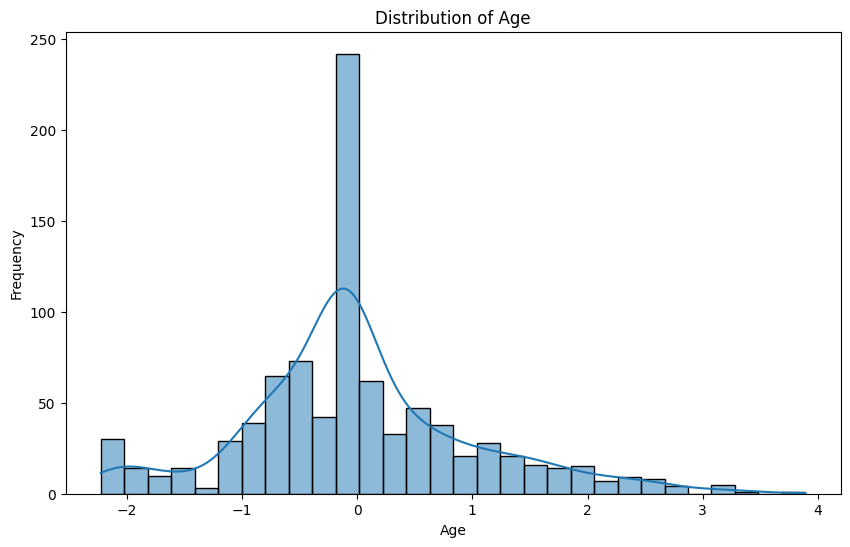

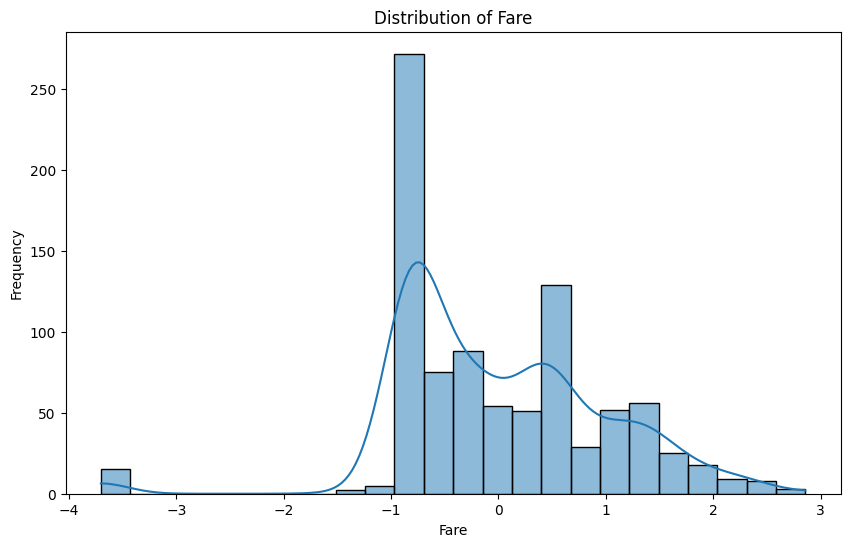

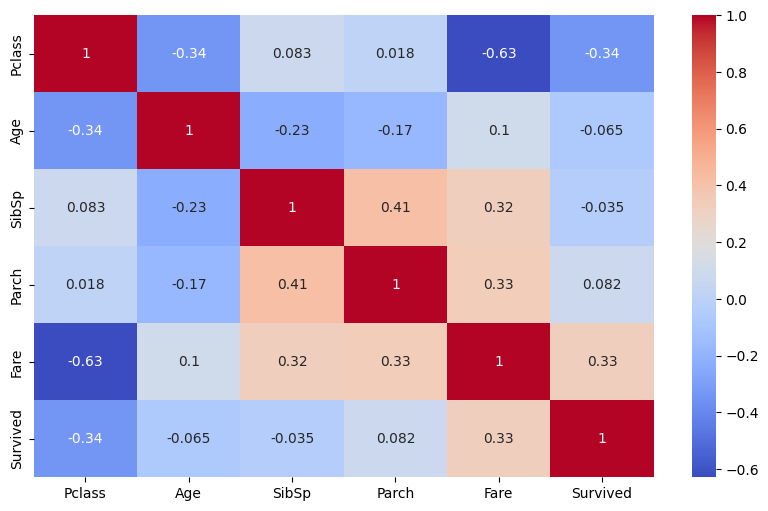

In [84]:
# prompt: Now plot these graphs

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train_data' DataFrame is already loaded and processed as in your provided code

# ... (Your existing code)

# Plotting code for the specified graphs
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(train_data.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


In [34]:
# # prompt: why still skewness is there

# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')  # Handles zero and negative values safely
# train_data[['Fare']] = pt.fit_transform(train_data[['Fare']])


In [85]:
for col in train_data.columns:
  null_count=train_data[col].isnull().sum();
  print(col,null_count)

Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0
Sex_male 0
Embarked_Q 0
Embarked_S 0
Cabin_B 0
Cabin_C 0
Cabin_D 0
Cabin_E 0
Cabin_F 0
Cabin_G 0
Cabin_T 0
Survived 0


In [86]:
# prompt: apply train test split and apply logistic regression algorithms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")


Accuracy of the Logistic Regression model: 0.8044692737430168


In [87]:
# prompt: apply xgboost classifier

!pip install xgboost

import xgboost as xgb
from sklearn.metrics import accuracy_score


# Separate features (X) and target variable (y)
# X = train_data.drop('Survived', axis=1)
# y = train_data['Survived']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
model = xgb.XGBClassifier(random_state=42) # You can tune hyperparameters here
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy}")


Accuracy of the XGBoost model: 0.8212290502793296


In [88]:
# prompt: apply grid search cv then apply xgboost

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the XGBoost model with the best hyperparameters
best_model = xgb.XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model with best hyperparameters: {accuracy}")


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Accuracy of the XGBoost model with best hyperparameters: 0.8324022346368715


In [111]:
# prompt: apply grid search cv for random forest classifier

from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100,150,200,250,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,4]
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
best_rf_params = rf_grid_search.best_params_
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set using the best Random Forest model
rf_y_pred = best_rf_model.predict(X_test)

# Evaluate the accuracy of the best Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy of the Random Forest model with best hyperparameters: {rf_accuracy}")


Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy of the Random Forest model with best hyperparameters: 0.8268156424581006


In [109]:
# prompt: apply decision tree algorithm along with grid search cv for my data

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10,14],
    'min_samples_leaf': [1, 2, 4,7]
}

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
dt_grid_search.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree
best_dt_params = dt_grid_search.best_params_
print(f"Best Hyperparameters for Decision Tree: {best_dt_params}")

# Train the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_dt_params, random_state=42)
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set using the best Decision Tree model
dt_y_pred = best_dt_model.predict(X_test)

# Evaluate the accuracy of the best Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy of the Decision Tree model with best hyperparameters: {dt_accuracy}")


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 2}
Accuracy of the Decision Tree model with best hyperparameters: 0.8268156424581006


In [99]:
# prompt: do the same EDA for my test data as well except outlier removal

# Load and preprocess the test data (similar to the training data, but without outlier removal)
test_data = pd.read_csv("../kaggle/test.csv")

# ... (Preprocessing steps for test data – refer to your training data preprocessing)
# Make sure to handle missing values, one-hot encode categorical features, etc.
#  but skip outlier removal in test data

# Example: Fill missing 'Embarked' values
test_data['Embarked'] = test_data['Embarked'].fillna('S')

# Example: Fill missing 'Age' values with the median
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


# Example: Fill missing 'Fare' values with the median (or another suitable imputation method)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


# One-hot encode categorical features
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

#Cabin
test_data['Cabin'] = test_data['Cabin'].str[0]
test_data['Cabin'].fillna('C', inplace=True)
test_data = pd.get_dummies(test_data, columns=['Cabin'], drop_first=True)


# Drop irrelevant columns
passenger_id_test = test_data['PassengerId']
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# Feature scaling (using the same scaler fitted on the training data)
test_data[['Age']] = scaler.transform(test_data[['Age']])
test_data[['Fare']] = pt.transform(test_data[['Fare']])


# Ensure the same columns exist in both train and test
missing_cols = set( X_train.columns ) - set( test_data.columns )
for c in missing_cols:
    test_data[c] = 0
test_data = test_data[X_train.columns]



<ipython-input-99-2b71ad521728>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
<ipython-input-99-2b71ad521728>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [112]:
# prompt:  remove passenger id from test data and save it then predict the output for the test data

# Predict on the test data using the best Random Forest model
predictions = best_rf_model.predict(test_data)

# Create a DataFrame for submission
submission_df = pd.DataFrame({'PassengerId': passenger_id_test, 'Survived': predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)
